# Assignment 2 - Landon Burleson 
## Problem 1
As described in the assignment document, this problem will discuss the derivation of the update rule
using the sigmoid activation function and the Mean Squared loss function. See the following LaTex
equations below for a step-by-step guide through the described derivation. 

The following equation is the Mean Square Error (MSE) Loss function used for this derivation:

$$MSE (L) = \frac{1}{n} \sum_{i = 1}^{n}(h_\theta(x^{(i)}) - y^{(i)})^2$$

The MSE derivative used for backpropagation and gradient descent is defined below:

$$ \frac{\partial L}{\partial Y} = \frac{2}{n} [y_1 - y_1^* \cdots y_i - y_i^*]$$

$$ = \frac{2}{n} (Y - Y*) $$

To capture the Loss with respect to a set of weights for a given layer in the network, the following chain rule is used:

$$ \frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial a_2} * \frac{\partial a_2}{\partial z_2} * \frac{\partial z_2}{\partial w_2}$$

To match nomenclature going forward, notice the following equation ($a_2$ represents the activation function output from the output layer of the neural network):

$$ \frac{\partial L}{\partial a_2} = \frac{2}{n}(a_2 - \hat{y})$$

The sigmoid function used for the activation function within this example is shown below:

$$g = \sigma(x) = \frac{1}{1+e^x}$$

The derivative of the sigmoid function is shown here:
$$ g' = \frac{\partial\sigma}{\partial x} = \frac{e^{-x}}{(1+e^{-x})^2}$$

Utilizing the above equations for sigmoid, the following relationship can be found:
$$ a_2 = g(z_2) $$
$$ \frac{\partial a_2}{\partial z_2} = a_2^2 * e^{-z_2}$$
$$\frac{\partial a_2}{\partial z_2} = a_2(1 - a_2)$$

Finally, to get the final term for the chain rule, use the following equations:
$$z_2 = W_2*a_1 + b_2$$
$$ \frac{\partial z_3}{\partial w_3} = a_1$$

The update rule equations via gradient descent are shown below for both the W and b parameters:
$$ W = W - \alpha \cdot \frac{\partial L}{\partial W} $$
$$ b = b - \alpha \cdot \frac{\partial L}{\partial b} $$



Considering the above equations, the following derivation showcases the necessary update rules for a
2-Layer architecture (i.e. 1 Input, 1 Hidden, 1 Output Layer).

Calculating the gradient of all the weights needed in the matrix is shown as: 

$$ \frac{\partial L}{\partial W} = 
\begin{bmatrix}
    \frac{\partial L}{\partial w_{11}} & \cdots & \frac{\partial L}{\partial w_{1j}} \\
    \vdots &  \ddots & \vdots \\ \frac{\partial L}{\partial w_{i1}} & \cdots & \frac{\partial L}{\partial w_{ij}}
\end{bmatrix}$$

Applying the chain rule yields the following expression: 

$$\frac{\partial L}{\partial W} = \frac{\partial L}{\partail y_1}  $$ 

$$\frac{\partial L}{\partial W} = $$
***

## Problem 2

The following git command is used to import the necessary files to run within the Google Colab
environment. 

In [23]:
!git clone https://github.com/lrburle/ML_Assignment2.git

fatal: destination path 'ML_Assignment2' already exists and is not an empty directory.


The following code block is the dependencies needed to run the __Problem 2__ code. Please view the
layer.py code for details in regards to how a layer object is defined and altered. This code is
available in the git repo referenced above for convenience. 

In [24]:
#Adding in the necessary modules needed to complete Assignment 2
import numpy as np
import matplotlib.pyplot as plt
import sys
 
# adding the subfolder to the path.
sys.path.insert(0, './ML_Assignment2')

from layer import Layer

In [25]:
class assign2:
        def mse(self, y_act, y_pred):
                n = y_act.shape[0]

                sum = 0

                for i in range(n):
                        sum += (y_pred[i]-y_act[i])**2
                error = (1/n) * sum
                return error 
        
        def mseDerivative(self, y_act, y_pred):
                return (2 / y_act.size) * (y_pred - y_act)

	#Used to modifify the input data appropriately
        def sigmoid(self, z):
                return 1 / (1 + np.exp(-z))

        def sigmoidDerivative(self, z):
                return self.sigmoid(z) * (1 - self.sigmoid(z))

        def tanh(self, z):
                return np.tanh(z)

        def tanhDerivative(self, z):
                return 1 - np.tanh(z)**2
        
        def relu(self, z):
                for i, val in enumerate(z[0, :]):
                        if z[:, i] >= 0:
                                z[:, i] = z[:, i]
                        else:
                                z[:, i] = 0
                return z
        
        def reluDerivative(self, z):
                for i, val in enumerate(z[0, :]):
                        if z[:, i] > 0:
                                z[:, i] = 1
                        if z[:, i] < 0:
                                z[:, i] = 0
                return z
        
        def softmax(self, z):
                return np.exp(z) / np.sum(np.exp(z))
        
        def linear(self, z):
                return z
        
        def linearDerivative(self, z):
                return np.ones((z.shape[0], z.shape[1]))

In [26]:
#Main Code - Creating the a2 object for NN functions.
a2 = assign2()

#Load in the data to be used for question 1
x_test = np.loadtxt('./ML_Assignment2/X_test.csv')
x_train = np.loadtxt('./ML_Assignment2/X_train.csv')
y_test = np.loadtxt('./ML_Assignment2/Y_test.csv')
y_train = np.loadtxt('./ML_Assignment2/Y_train.csv')

### P2 - Initial Data Set
The following code outputs the relationship between the input x and output y with each respective
feature set. See graph below for details. 

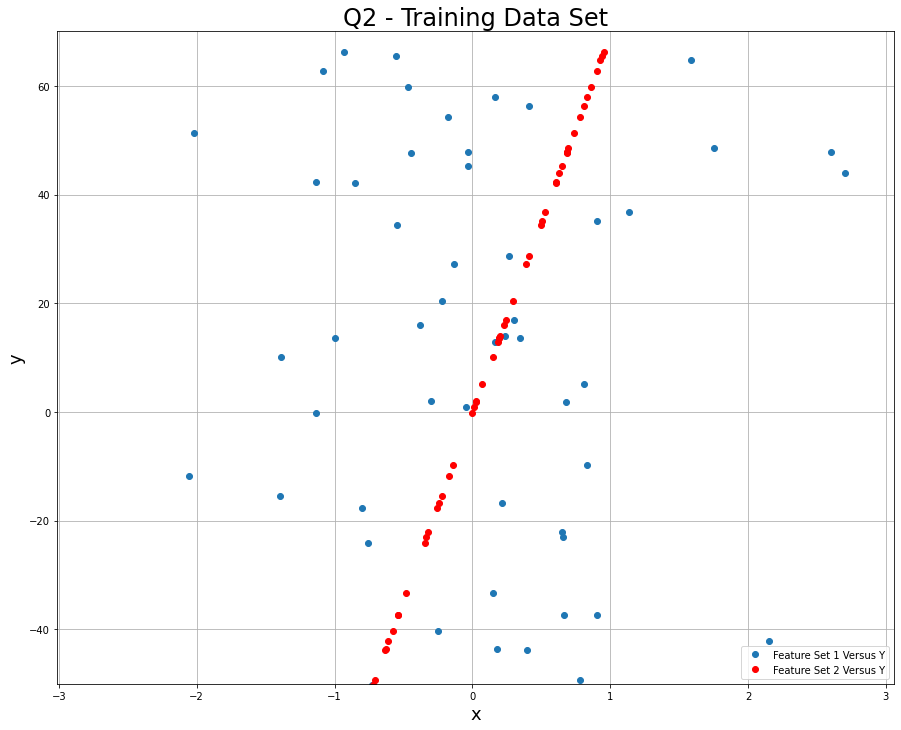

In [27]:
#Plot the initial training data.
plt.figure(0, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Training Data Set', fontsize=24)
plt.ylim(-50, 70)
train, test = plt.plot(x_train[:, 0], y_train, 'o',  x_train[:, 1], y_train, 'ro')

train.set_label('Feature Set 1 Versus Y')
test.set_label('Feature Set 2 Versus Y')
plt.grid()
plt.legend(loc='lower right')

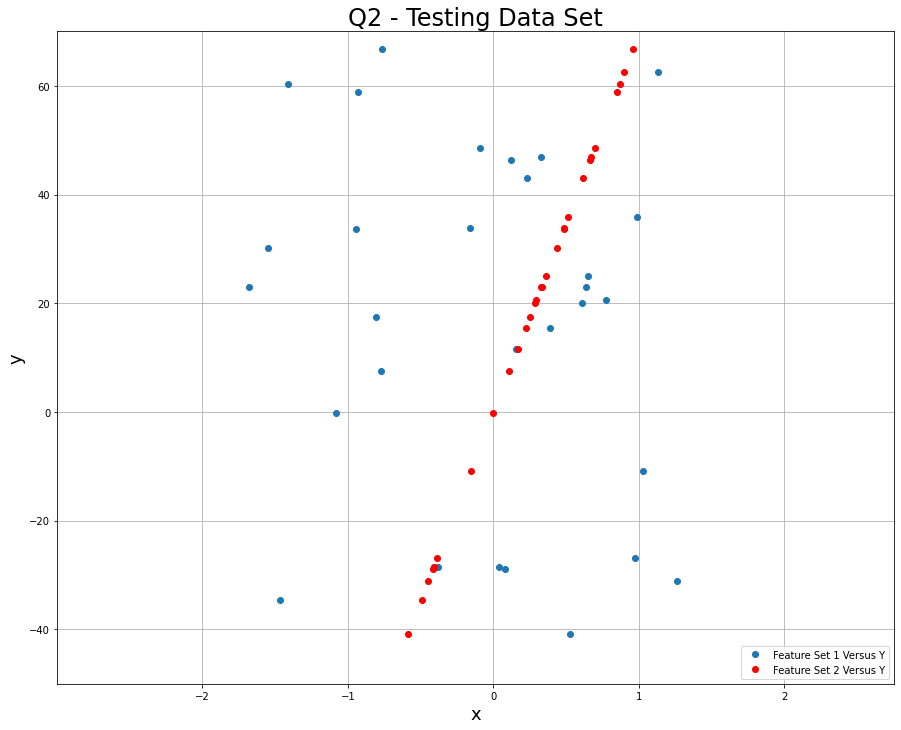

In [28]:
#Plot the initial testing data.
plt.figure(1, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Testing Data Set', fontsize=24)
plt.ylim(-50, 70)
train, test = plt.plot(x_test[:, 0], y_test, 'o',  x_test[:, 1], y_test, 'ro')

train.set_label('Feature Set 1 Versus Y')
test.set_label('Feature Set 2 Versus Y')
plt.grid()
plt.legend(loc='lower right')

### P2 - Training (Best MSE Convergence and Prediction Chart)

The following code in this section represents the code used to train the desired neural network with
the 1 - 1 - 1 architecture (1 input, 1 hidden, and 1 output layers).  

Current epochs is 0 @ loss = 4948.384506732822
Current epochs is 1 @ loss = 3594.943707311864
Current epochs is 2 @ loss = 2872.5908197075205
Current epochs is 3 @ loss = 2441.4633618667767
Current epochs is 4 @ loss = 2141.8259925808343
Current epochs is 5 @ loss = 1915.7927301533555
Current epochs is 6 @ loss = 1735.8744144183986
Current epochs is 7 @ loss = 1585.9707006292879
Current epochs is 8 @ loss = 1453.9609025170676
Current epochs is 9 @ loss = 1331.8759123498457
Current epochs is 10 @ loss = 1218.1335130368968
Current epochs is 11 @ loss = 1114.1995312795393
Current epochs is 12 @ loss = 1021.9403536556997
Current epochs is 13 @ loss = 940.9488271473213
Current epochs is 14 @ loss = 869.9163704953037
Current epochs is 15 @ loss = 807.4115389573471
Current epochs is 16 @ loss = 752.1387024637311
Current epochs is 17 @ loss = 702.9935622841435
Current epochs is 18 @ loss = 659.0440765329784
Current epochs is 19 @ loss = 619.5032074073833
Current epochs is 20 @ loss = 583.71660

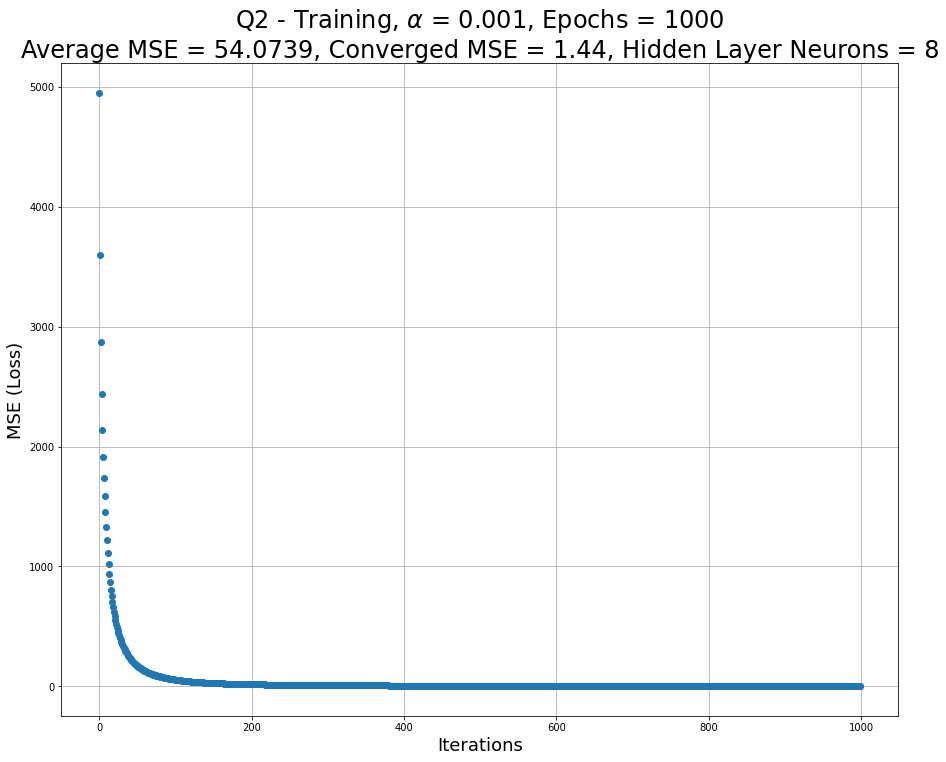

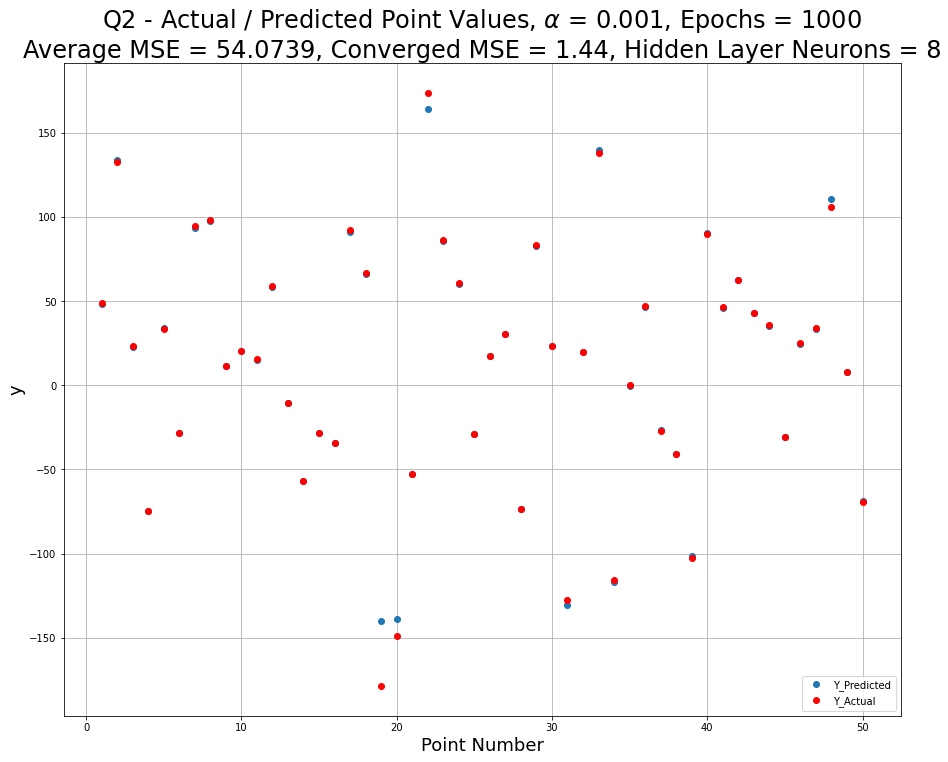

In [29]:
epochs = 1000
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')


### P2 - $\alpha$ Sweep

This section explores the effect of the varying the learning rate with respect to the MSE output. 

Current epochs is 0 @ loss = 5067.731526786847
Current epochs is 1 @ loss = 3864.6236942048927
Current epochs is 2 @ loss = 3151.793719049172
Current epochs is 3 @ loss = 2702.1276937041434
Current epochs is 4 @ loss = 2381.5867942431155
Current epochs is 5 @ loss = 2135.416266846543
Current epochs is 6 @ loss = 1937.2522039125438
Current epochs is 7 @ loss = 1771.8591187278776
Current epochs is 8 @ loss = 1628.8555514524483
Current epochs is 9 @ loss = 1498.766819676063
Current epochs is 10 @ loss = 1376.9935232349183
Current epochs is 11 @ loss = 1264.3570840110629
Current epochs is 12 @ loss = 1162.4335934319695
Current epochs is 13 @ loss = 1071.922426838907
Current epochs is 14 @ loss = 991.9252846158946
Current epochs is 15 @ loss = 920.9721277924549
Current epochs is 16 @ loss = 857.7192557340458
Current epochs is 17 @ loss = 801.0499925339709
Current epochs is 18 @ loss = 750.0548585794719
Current epochs is 19 @ loss = 704.0007205260687
Current epochs is 20 @ loss = 662.2876768

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


Current epochs is 14 @ loss = 902.4079340873171
Current epochs is 15 @ loss = 900.0352684464915
Current epochs is 16 @ loss = 899.4151467105876
Current epochs is 17 @ loss = 899.1347182130361
Current epochs is 18 @ loss = 898.9781789463798
Current epochs is 19 @ loss = 898.8851818076149
Current epochs is 20 @ loss = 898.8288652295417
Current epochs is 21 @ loss = 898.7945122702091
Current epochs is 22 @ loss = 898.7734764940524
Current epochs is 23 @ loss = 898.7605584078492
Current epochs is 24 @ loss = 898.7526020417707
Current epochs is 25 @ loss = 898.7476828879236
Current epochs is 26 @ loss = 898.7446242288403
Current epochs is 27 @ loss = 898.7427053435571
Current epochs is 28 @ loss = 898.7414842695242
Current epochs is 29 @ loss = 898.7406897145258
Current epochs is 30 @ loss = 898.7401549761337
Current epochs is 31 @ loss = 898.7397774789184
Current epochs is 32 @ loss = 898.739493971689
Current epochs is 33 @ loss = 898.7392653117163
Current epochs is 34 @ loss = 898.7390671

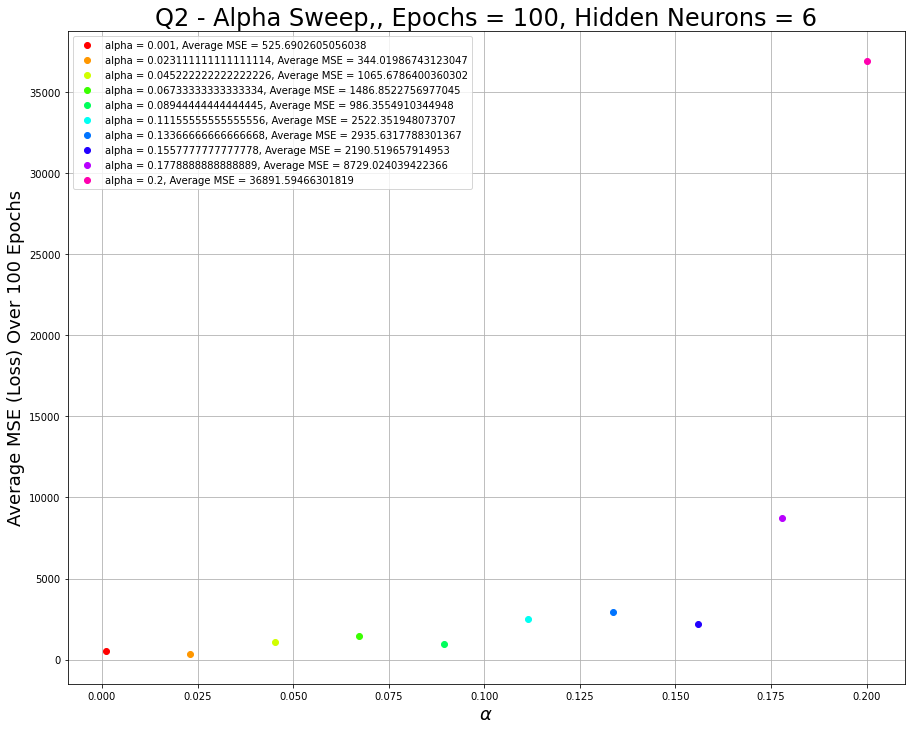

In [30]:
epochs = 100
hidden_layer_neurons = 6

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel(r'$\alpha$', fontsize=18)
plt.ylabel(f'Average MSE (Loss) Over {epochs} Epochs', fontsize=18)
plt.title(f'Q2 - Alpha Sweep,' f', Epochs = {epochs}, Hidden Neurons = {hidden_layer_neurons}', fontsize=24)

alpha_sweep = np.linspace(0.001, 0.2, 10)

#Used to cycle colors for the plots.
N = len(alpha_sweep)
cmap = plt.cm.get_cmap("hsv", N+1)

for idx, alpha in enumerate(alpha_sweep):
	iterations = []
	error = []

	#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
	hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
	output_layer = Layer(hidden_layer_neurons, 1, a2.linear, a2.linearDerivative, alpha)

	for k in range(epochs):
		y_pred = []
		iterations.append(k)
		# Iterate through training samples
		for i in range(x_train.shape[0]):
			out = np.array([x_train[i]])
			out = hidden_layer.forwardprop(out)
			out = output_layer.forwardprop(out)

			y_pred.append(out)

			# backward propagation
			loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
			loss_deriv_out = output_layer.backprop(loss_deriv_out)
			loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

		error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
		
		print(f'Current epochs is {k} @ loss = {error[-1]}')

	plt.plot(alpha, np.mean(error), 'o', c=cmap(idx), label=f'alpha = {alpha}, Average MSE = {np.mean(error)}')

plt.grid()
plt.legend(loc='upper left')

As shown above, the Average MSE exponentially increases as the learning rate increases towards 1. As
the learning rate approaches 1, the Average MSE approaches infinity as the Neural Network becomes
unstable. 
***

### P2 - Number of Neurons Sweep

This section explores how the Neural Network reacts when the neurons in the hidden layer are
increased from 1 to 10. 

Current epochs is 0 @ loss = 4607.446492417421
Current epochs is 1 @ loss = 3615.3626887795685
Current epochs is 2 @ loss = 2422.622451522673
Current epochs is 3 @ loss = 2131.129105670193
Current epochs is 4 @ loss = 1843.699195852686
Current epochs is 5 @ loss = 1721.114420995157
Current epochs is 6 @ loss = 1873.555797265726
Current epochs is 7 @ loss = 1760.9722265607597
Current epochs is 8 @ loss = 1760.577042349129
Current epochs is 9 @ loss = 1752.2916745081109
Current epochs is 10 @ loss = 1701.9083527199552
Current epochs is 11 @ loss = 1699.4798162168893
Current epochs is 12 @ loss = 1733.0092979510798
Current epochs is 13 @ loss = 1892.7047637679227
Current epochs is 14 @ loss = 2079.8203787641723
Current epochs is 15 @ loss = 2261.08107855384
Current epochs is 16 @ loss = 2303.261545906378
Current epochs is 17 @ loss = 2234.673160041827
Current epochs is 18 @ loss = 1886.7972994341483
Current epochs is 19 @ loss = 1704.5483211251826
Current epochs is 20 @ loss = 1773.532278

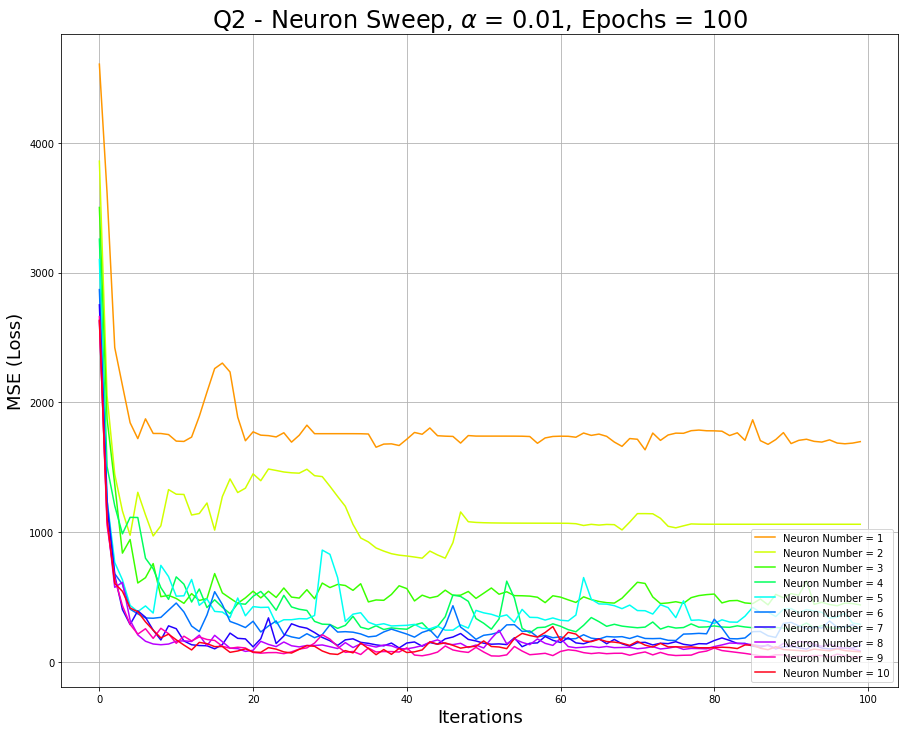

In [31]:
epochs = 100
alpha = 0.01

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)
plt.title(f'Q2 - Neuron Sweep,' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}', fontsize=24)

neuron_sweep = [1,2,3,4,5,6,7,8,9,10]

#Used to cycle colors for the plots.
N = len(neuron_sweep)
cmap = plt.cm.get_cmap("hsv", N+1)

for n in neuron_sweep:
	hidden_layer_neurons = n
	iterations = []
	error = []

	#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
	hidden_layer = Layer(2, hidden_layer_neurons, a2.sigmoid, a2.sigmoidDerivative, alpha) 
	output_layer = Layer(hidden_layer_neurons, 1, a2.linear, a2.linearDerivative, alpha)

	for k in range(epochs):
		y_pred = []
		iterations.append(k)
		# Iterate through training samples
		for i in range(x_train.shape[0]):
			out = np.array([x_train[i]])
			out = hidden_layer.forwardprop(out)
			out = output_layer.forwardprop(out)

			y_pred.append(out)

			# backward propagation
			loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
			loss_deriv_out = output_layer.backprop(loss_deriv_out)
			loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

		error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
		
		print(f'Current epochs is {k} @ loss = {error[-1]}')

	plt.plot(iterations, error, '-', c=cmap(n), label=f'Neuron Number = {n}')

plt.grid()
plt.legend(loc='lower right')

result =[]
for i in range(x_test.shape[0]):
	out = x_test[i]
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	result.append(out)



As can be seen from the chart above, as the number of neurons increase in the hidden layer, the
Average MSE approaches 0 over the course of a number of iterations. The neuron number between 5 and
10 seemed to converge around the same MSE value and have a negligible impact of the overall results.
Hidden layers with less than 5 neurons seem to be unstable and seem to be caught in a local minima
instead of the absolute minima of the objective function. Also, with the number of neurons
increasing, the greater the chance the network becomes overfitted to the data and memorizes instead
of generalize. In terms of the results shown in section __P2 - Training (Best MSE Convergence and
Prediction Chart)__ , the data seemed to fit quite nicely and generalized to the majority of points
with minimal error in predictions. 
***

### P2 - Activation Function Experimentation

This section explores the effect of different activation functions of the performance of the Neural
Network. 

Current epochs is 0 @ loss = 2947.1391009443573
Current epochs is 1 @ loss = 998.7113576619904
Current epochs is 2 @ loss = 553.6409558858319
Current epochs is 3 @ loss = 334.9118989779852
Current epochs is 4 @ loss = 260.86177974641623
Current epochs is 5 @ loss = 274.0455062759945
Current epochs is 6 @ loss = 141.82782347653426
Current epochs is 7 @ loss = 114.43249995945625
Current epochs is 8 @ loss = 91.56594716930233
Current epochs is 9 @ loss = 74.52542958415606
Current epochs is 10 @ loss = 75.81342738918855
Current epochs is 11 @ loss = 78.84037434033696
Current epochs is 12 @ loss = 67.83696908513352
Current epochs is 13 @ loss = 67.23669159125734
Current epochs is 14 @ loss = 87.64801964161025
Current epochs is 15 @ loss = 59.24570314485633
Current epochs is 16 @ loss = 60.717638780966645
Current epochs is 17 @ loss = 107.77219167614898
Current epochs is 18 @ loss = 136.49878259226585
Current epochs is 19 @ loss = 62.6754990597778
Current epochs is 20 @ loss = 50.08710288027

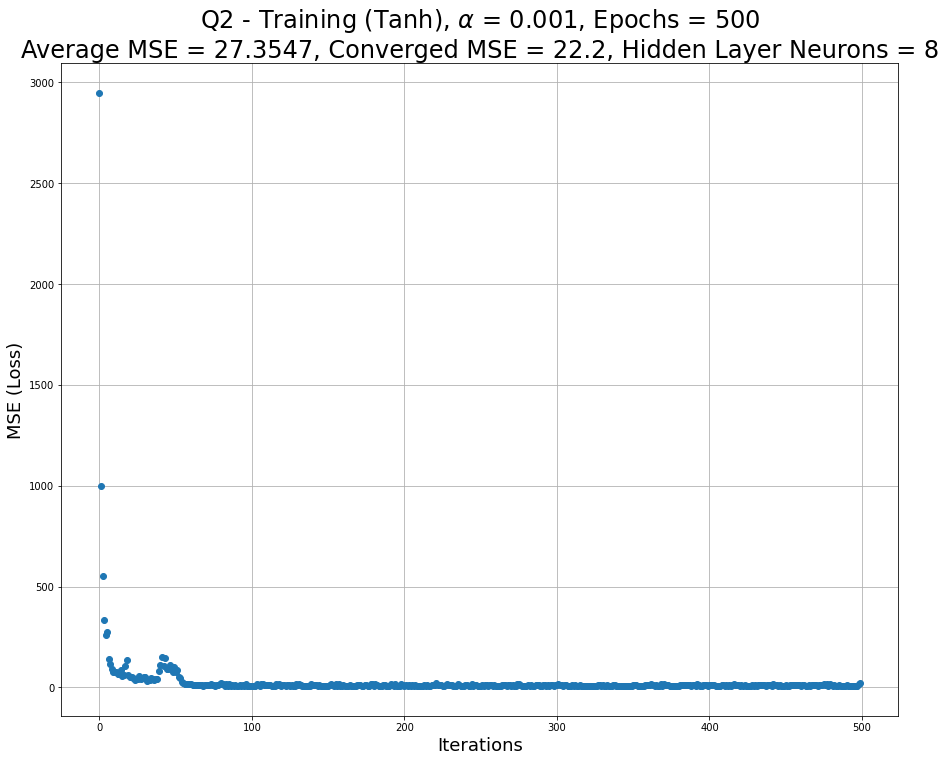

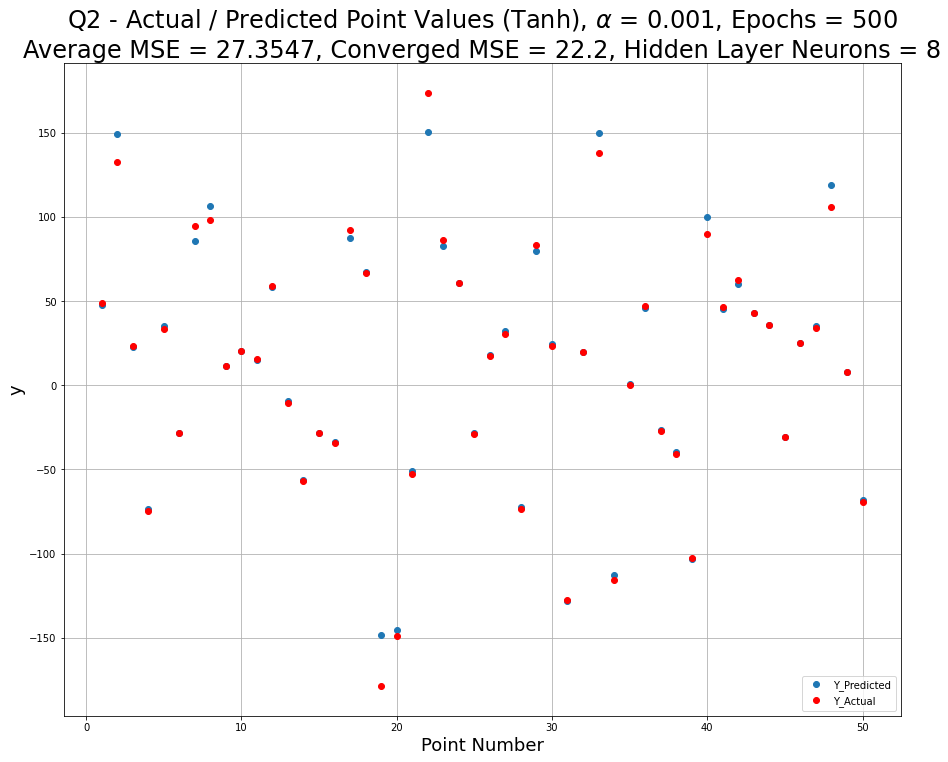

In [32]:
epochs = 500
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.tanh, a2.tanhDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training (Tanh),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values (Tanh),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')

Current epochs is 0 @ loss = 2621.0203797096224
Current epochs is 1 @ loss = 1892.1199624659343
Current epochs is 2 @ loss = 1669.3089474335893
Current epochs is 3 @ loss = 1483.0436507076167
Current epochs is 4 @ loss = 1324.5034152999372
Current epochs is 5 @ loss = 1188.3421727432121
Current epochs is 6 @ loss = 1070.6781717103436
Current epochs is 7 @ loss = 968.6878739289833
Current epochs is 8 @ loss = 880.2399502734453
Current epochs is 9 @ loss = 803.3613656920279
Current epochs is 10 @ loss = 736.3334200084033
Current epochs is 11 @ loss = 677.6402338312814
Current epochs is 12 @ loss = 625.9598033238045
Current epochs is 13 @ loss = 580.1928027229378
Current epochs is 14 @ loss = 539.433914222955
Current epochs is 15 @ loss = 503.09532045419263
Current epochs is 16 @ loss = 470.5810776374049
Current epochs is 17 @ loss = 441.27461263983116
Current epochs is 18 @ loss = 414.69184541741896
Current epochs is 19 @ loss = 390.4438468036621
Current epochs is 20 @ loss = 368.2376542

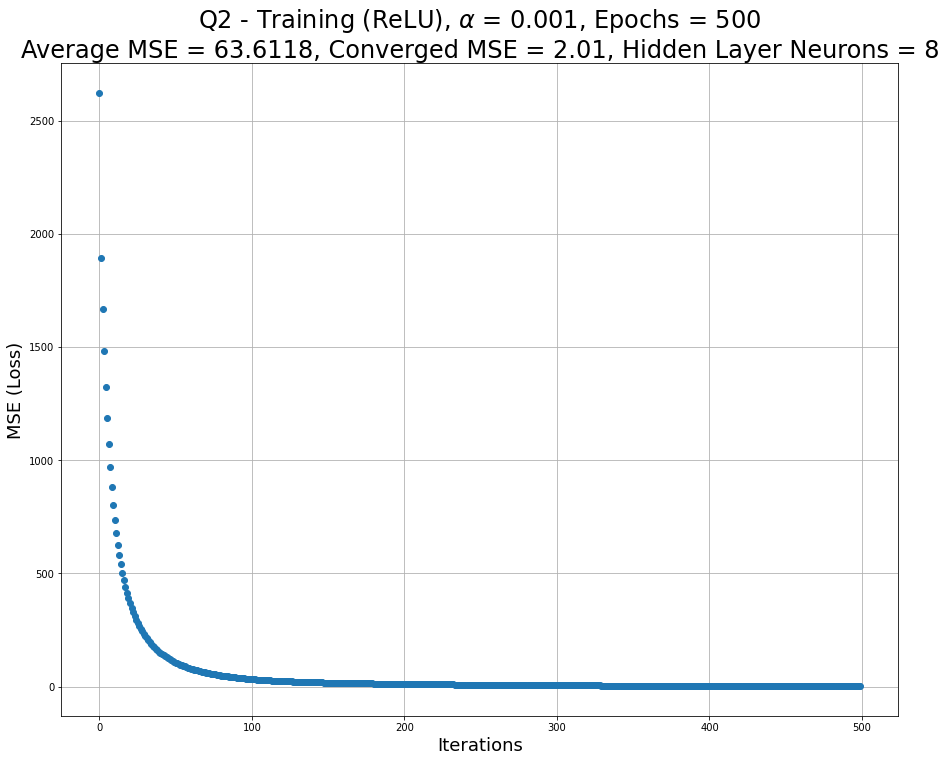

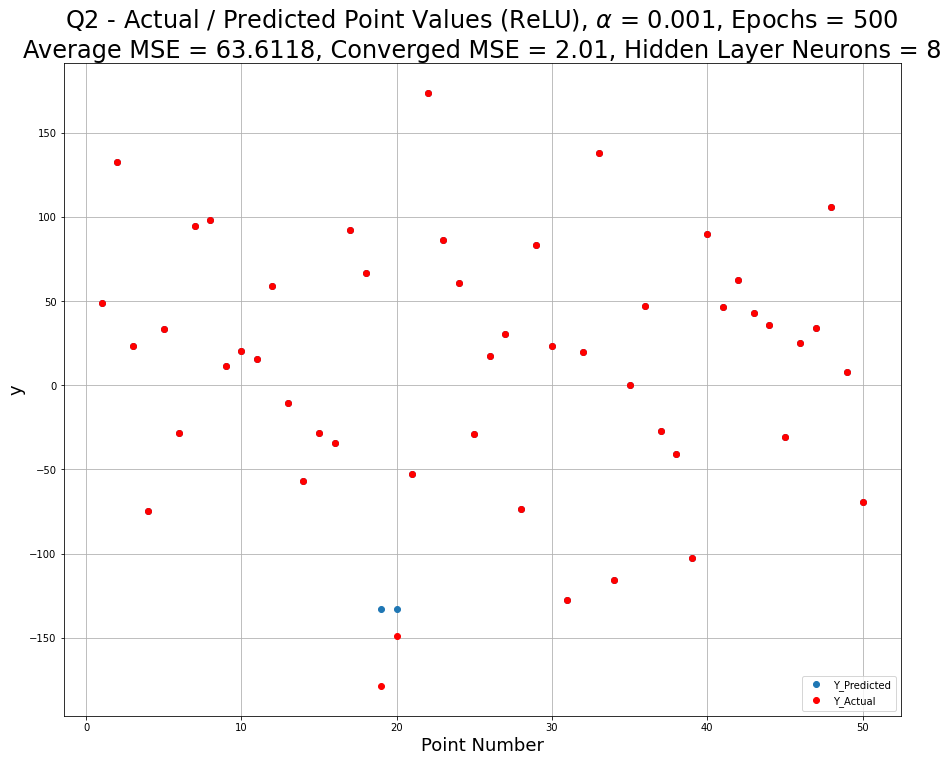

In [33]:
epochs = 500
alpha = 0.001

#Plot the training data.
plt.figure(2, figsize=[15, 12])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('MSE (Loss)', fontsize=18)

hidden_layer_neurons = 8
output_neurons = 1
iterations = []
error = []

#Inputs the number of inputs, outputs, actiavtion function, activation function derivative for backprop, and learning rate to each layer. 
hidden_layer = Layer(2, hidden_layer_neurons, a2.relu, a2.reluDerivative, alpha) 
output_layer = Layer(hidden_layer_neurons, output_neurons, a2.linear, a2.linearDerivative, alpha)

for k in range(epochs):
	y_pred = []
	iterations.append(k)
	# Iterate through training samples
	for i in range(x_train.shape[0]):
		out = np.array([x_train[i]])
		out = hidden_layer.forwardprop(out)
		out = output_layer.forwardprop(out)

		y_pred.append(out)

		# backward propagation
		loss_deriv_out = a2.mseDerivative(y_train[i], out[0])
		loss_deriv_out = output_layer.backprop(loss_deriv_out)
		loss_deriv_out = hidden_layer.backprop(loss_deriv_out)

	error.append(float(a2.mse(y_train, y_pred)))  #Finds the average error for the current epoch
	
	print(f'Current epochs is {k} @ loss = {error[-1]}')

plt.title(f'Q2 - Training (ReLU),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(iterations, error, 'o')
plt.grid()

#######Predictions
predictions =[]
for i in range(x_test.shape[0]):
	out = np.array([x_test[i]])
	out = hidden_layer.forwardprop(out)
	out = output_layer.forwardprop(out)

	predictions.append(out)

points = np.linspace(1, 50)
predictions = np.array(predictions)
predictions = predictions.reshape(-1,)

#Plot the training data.
plt.figure(3, figsize=[15, 12])
plt.xlabel('Point Number', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q2 - Actual / Predicted Point Values (ReLU),' + r' $\alpha$ = ' + f'{alpha}' + f', Epochs = {epochs}' + f'\nAverage MSE = {np.mean(error):.6}, Converged MSE = {error[-1]:.3}, Hidden Layer Neurons = {hidden_layer_neurons}', fontsize=24)
plt.plot(points, predictions, 'o', label='Y_Predicted')
plt.plot(points, np.array([y_test]).reshape(-1,), 'ro', label='Y_Actual')
plt.grid()
plt.legend(loc='lower right')

As shown above, the TanH and ReLU activation functions were used to train the Neural Network with
the results shown above. In comparison of performance between Sigmoid, TanH, and ReLU, the TanH
function seemed to converge the fastest with the same learning rate and topology. In terms of the
function used, I believe this is due to TanH included negative values while the others omit the
negative values. Since the data set has values that are less than zero, the using the hyperbolic
tangent function seems to provide the best performance in relation to the input data. 
***

## P3 - Question Responses

1. A linear activation function would best serve the needs for the output layer since the output
   ranges between -40 and 65 per the test and training set. Majority of the activation functions
   would truncate or ignore the negative values of the output and produce incorrect predictions. 

2. There should only be a single neuron in the output layer due to the dimensions of the output being
   singular per training / test set. The data set is a regression is regressive in nature. No
   classification required. 

3. The best metrics achieved can be reviewed in the __P2 - Training (Best MSE Convergence and
   Prediction Chart)__ section shown above. The Average MSE for 1000 epochs and $\alpha$ 0.001
   learning rate, hovers around 53 - 50 per run. 

4. Please refer to the __P2 - Training (Best MSE Convergence and
   Prediction Chart)__ section above for more information regarding the plot
   between MSE loss versus epochs (iterations). 

5. The learning rate effects the performance of the neural network by the speed at which updates
   occur during gradient descent for backpropagation for each individual layer in the network. As
   the learning rate was increased, the performance decreased significantly and convergence was
   non-existent due to the extreme learning rates involved. A learning rate 0.18 or less seemed to
   perform the best in terms of convergence and accuracy in regards to predictions.   

6. 
   a. The update rule does not need to be changed or derived again due to the fact that only the
   weight and bias matrices change in accordance to the number of neurons in each hidden layer. The
   architecture of the network hasn't changed. 

   b. As seen in section __P2 - Number of Neurons Sweep__ , as the number of neurons increased, the
   MSE also generally improved. The true turning point is the transition between 4 and 5 neurons in
   the layer. As the number of neurons increased past 5, the performance of the networks saw
   diminishing improvements. Too many neurons could also cause overfitting to occur to the data set.

7. 
   a / b. The update rule would need to be changed in order to accommodate the derivative of the new
   activation function inside of the backpropagation function. However, this is the only change
   required to operate the neural network.  
   
   c. The results of utilizing different activations functions proved to be useful for the dataset.
   The Tanh function provided the fastest convergence with the same network architecture and
   learning rate. This is due to the Tanh function utilizing negative values while ReLU and sigmoid
   either ignore or truncate between 0 and 1 respectively. Due to the datasets utilizing negative
   values, the Tanh function makes sense to use to capture those feature characteristics. 